# Data Wrangling
Data wrangling is the process of **cleaning, transforming, and organizing** data so that it can be used for **analysis and visualization**. It is an important step in the data analysis process because raw data is Often incomplete, inconsistance and in an unstrastured format, which can make diffcult to work with.
- Data wrangling helps to make the data more consistent ,accurate and useful for analysis and decision making.
- Data deriven desion is called data science.

### Steps:
1. Gathering data
2. tools to clean data -libraries
3. how to do?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset('titanic')

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
df.isnull().sum()/ len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [30]:
df.drop(columns='deck', inplace=True)

In [31]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Dealing Missing values

In [32]:
#numerical value fill by mean of that data 
df['age'] = df.age.fillna(value=df['age'].mean())

In [40]:
#catogorical value fill by mode most repetative
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0])

In [41]:
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

# Outliers removers

## Visualization method

<AxesSubplot:xlabel='sex', ylabel='age'>

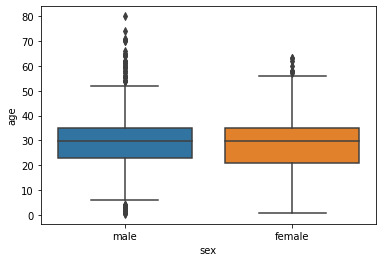

In [48]:
sns.boxplot(data=df, y='age',x='sex')

## IQR Methods

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)


Once you get the upperbound and lowerbound, all you have to do is to delete any values which is less than lowerbound or greater than upperbound.

In [49]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

13.0

In [53]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [56]:
#Using the above function, lets get the lowerbound and upperbound values

lowerbound,upperbound = outlier_treatment(df.age)
print(lowerbound)
upperbound

2.5


54.5

In [57]:
#Lets check which column is considered as an outlier

df[(df.age < lowerbound) | (df.age > upperbound)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,Southampton,yes,True
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,Cherbourg,yes,False
829,1,1,female,62.00,0,0,80.0000,S,First,woman,False,Southampton,yes,True
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,Southampton,no,True


In [59]:
#Now lets remove the outliers from the dataset.

df.drop(df[ (df.age > upperbound) | (df.age < lowerbound) ].index , inplace=True)

<AxesSubplot:ylabel='age'>

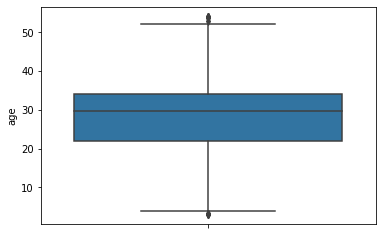

In [61]:
#Lets see the box plot after outlier removal

sns.boxplot(data= df, y= 'age')

# Duplicates

In [63]:
#find Duplicates
df.duplicated().sum()

0

In [66]:
df_duplicated = df[df.duplicated()]
df_duplicated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [64]:
# droping duplicates
df.drop_duplicates(inplace= True)

# Data Transformation(Normalization)

Data normalization in machine learning is the process of scaling data values so that they are on the **same scale**, allowing for more accurate comparisons and predictions.

There are three types of normalization techniques:

- **Min-Max Normalization:** This technique scales data between a specified range, usually between 0 and 1. This helps in eliminating the effect of large scale data values on the model.

- **Z-Score Normalization:** This technique transforms the data values to standard deviation units. It helps in transforming the data to have a mean of 0 and a standard deviation of 1.

- **Log Normalization:** This technique transforms the data values to logarithmic values. It helps in reducing the effect of extreme data values and improves the accuracy of the model.

The type of normalization technique used depends on the data and the problem being solved. 
- Min-Max normalization is suitable for datasets with large differences in scale
- Z-Score normalization is best for datasets with normal distributions. 
- Log normalization is best for datasets with skewed distributions or extreme values.

In [ ]:
from sklearn.preprocessing import minmax_scale

In [4]:
#pip install sckit-learn
#1. import libraries
from sklearn.preprocessing import MinMaxScaler

#2. data
df

#3. select Columns to normilize (numerical col)
col_to_nurmalize = ['age', 'fare']

#4. create scaler object/function

scaler = MinMaxScaler()

#5. fit and transfrom the 
df[col_to_nurmalize]= scaler.fit_transform(df[col_to_nurmalize])

#6. check the data
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,0.045771,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0.321438,0,0,0.058556,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.367921,0.523008,0.381594,0.062858
std,0.486592,0.836071,0.182540,1.102743,0.806057,0.096995
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.247612,0.000000,0.000000,0.015440
50%,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,3.000000,0.472229,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


**The data normalize and in range of 0-1**

# Standrad Scaler

The equation for Standard Scaler is as follows:

**X_standardized = (X - mean(X)) / standard deviation(X)**

Where X is the original data and X_standardized is the standardized data. The mean and standard deviation are calculated from the original data.

In [7]:
#In this code, the min_max_scaler function takes in a numpy array data and 
#returns the scaled data using the Min-Max Scaler technique. 
#The min and max values of the data are calculated using 
#the np.min and np.max functions, respectively.

import numpy as np

def min_max_scaler(data):
    min_data = np.min(data)
    max_data = np.max(data)
    return (data - min_data) / (max_data - min_data)

# Sample data
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Min-Max Scaler function
X_scaled = min_max_scaler(X)

print(X_scaled)






[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]


In [6]:
#pip install sckit-learn
#1. import libraries
from sklearn.preprocessing import StandardScaler

#2. data
df

#3. select Columns to normilize (numerical col)
col_to_nurmalize = ['age', 'fare']

#4. create scaler object/function

scaler = StandardScaler()

#5. fit and transfrom the 
df[col_to_nurmalize]= scaler.fit_transform(df[col_to_nurmalize])

#6. check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,-0.386671,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,-0.044381,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,-0.176263,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,-0.044381,C,First,man,True,C,Cherbourg,yes,True


# Log transformation
it is a technique used to transform data that has a skewed or non-uniform distribution into a more normal distribution. The log transformation is applied to the data by taking the logarithm of each value in the data. This can help to improve the performance of machine learning algorithms by reducing the impact of outliers or skewness in the data.

There are different types of log transformations, including natural logarithm (ln), base-10 logarithm (log10), and base-2 logarithm (log2). The choice of logarithm will depend on the scale of the data and the specific requirements of the machine learning algorithm.

In Python, the log transformation can be performed using the np.log function from the numpy library:

In [9]:
import numpy as np

# Sample data
X = np.array([1, 2, 3, 4, 5])

# Log transformation (natural logarithm)
X_log = np.log(X)

print(X_log)


[0.         0.69314718 1.09861229 1.38629436 1.60943791]


In this code, the natural logarithm of each value in the sample data X is calculated using the np.log function and stored in X_log.

In conclusion, log transformation is a useful technique for transforming skewed or non-uniform data into a more normal distribution. It can improve the performance of machine learning algorithms and help to reduce the impact of outliers or skewness in the data.

**Befor apply log tranformation and check for outliers**

In [18]:
kashti=sns.load_dataset('titanic')

kashti['age'] =kashti['age'].fillna(kashti['age'].mean())
kashti['fare'] =kashti['fare'].fillna(kashti['fare'].mean())

#log transfrom
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])

kashti.head()

C:\Users\A\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


# Organizing data
- The data will be organize for esay which make scence.
- column addtion 
- renaming 
- piovate table

In [10]:
df['family_size']= df['sibsp'] + df['parch']

In [11]:
df= df.rename(columns = {'parch' : 'Parent_childern'})

In [13]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'Parent_childern', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

In [17]:
table = pd.pivot_table(df, values='fare', index='pclass',
                       columns='survived', aggfunc=np.sum)
table

survived,0,1
pclass,,
1,52.317648,173.619789
2,-24.983369,-17.777322
3,-138.827900,-44.348846
